In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
X_train.shape

(227, 13)

In [7]:
X_test.shape

(76, 13)

In [18]:
mm = MinMaxScaler()
mmarr = mm.fit_transform(X_train)
X_train_mmdf = pd.DataFrame(mmarr, columns=X_train.columns)

In [19]:
X_train_mmdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.583333,1.0,0.333333,0.612245,0.233256,0.0,0.0,0.666667,0.0,0.000000,1.0,0.25,0.666667
1,0.625000,1.0,0.666667,0.326531,0.200924,1.0,0.5,0.403509,0.0,0.392857,0.5,0.25,0.333333
2,0.791667,1.0,0.000000,0.316327,0.284065,1.0,0.5,0.657895,0.0,0.035714,0.5,0.50,1.000000
3,0.604167,1.0,0.333333,0.316327,0.205543,0.0,0.5,0.491228,0.0,0.071429,0.5,1.00,1.000000
4,0.187500,1.0,0.666667,0.448980,0.101617,0.0,0.5,0.745614,0.0,0.000000,1.0,1.00,0.666667


In [20]:
ss = StandardScaler()
ssarr = ss.fit_transform(X_train)
X_train_ssdf = pd.DataFrame(ssarr, columns=X_train.columns)

In [21]:
X_train_ssdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.267453,0.716473,-0.012774,1.403628,-0.264730,-0.382707,-1.044861,0.633359,-0.681554,-0.931266,0.973518,0.303280,-0.530445
1,0.483126,0.716473,0.953822,-0.243918,-0.526658,2.612965,0.837547,-0.696636,-0.681554,1.062194,-0.663435,0.303280,-2.202821
2,1.345818,0.716473,-0.979371,-0.302759,0.146871,2.612965,0.837547,0.589026,-0.681554,-0.750042,-0.663435,1.301027,1.141931
3,0.375290,0.716473,-0.012774,-0.302759,-0.489240,-0.382707,0.837547,-0.253304,-0.681554,-0.568819,-0.663435,3.296520,1.141931
4,-1.781440,0.716473,0.953822,0.462173,-1.331151,-0.382707,0.837547,1.032357,-0.681554,-0.931266,0.973518,3.296520,-0.530445


In [23]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
skb = SelectKBest(score_func=chi2, k=10)
skb_fit = skb.fit(X_train_mmdf, y_train)

In [26]:
skb_fit.scores_

array([7.37530383e-01, 6.83261510e+00, 1.48298388e+01, 1.33353430e-01,
       5.60610903e-02, 3.49903345e-03, 6.09841282e-01, 2.40896889e+00,
       3.05003306e+01, 9.22006174e+00, 3.56531529e+00, 1.19734527e+01,
       1.39165006e+00])

In [28]:
score_chi2 = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(skb_fit.scores_)], axis= 1)

In [30]:
score_chi2.columns = ['Feature', 'Score']

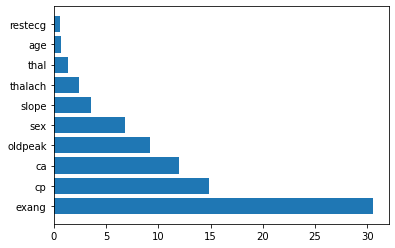

In [45]:
score_chi2.sort_values('Score', ascending=False)
plt.barh(score_chi2.sort_values('Score', ascending=False).nlargest(10, 'Score').Feature, score_chi2.sort_values('Score', ascending=False).nlargest(10, 'Score').Score)
plt.show()

In [47]:
etc = ExtraTreesClassifier()
etc_fit = etc.fit(X_train_ssdf, y_train)

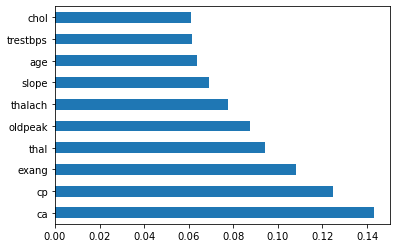

In [51]:
score_etc = pd.Series(etc_fit.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

In [8]:
chi2_features = ['ca', 'cp', 'exang', 'oldpeak', 'sex']
etc_features = ['ca', 'cp', 'exang', 'oldpeak', 'thal']

In [66]:
X_test[chi2_features]

,ca,cp,exang,oldpeak,sex
179,1,0,1,0.6,1
228,0,3,0,0.2,1
111,1,2,0,0.2,1
246,2,0,1,1.9,0
60,1,2,0,0.0,0
...,...,...,...,...,...
22,0,0,0,0.0,1
258,0,0,1,1.4,0
56,0,0,0,0.0,1
242,2,0,0,2.0,1


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, auc, roc_curve

In [58]:
#Using all features 
lr = LogisticRegression()
lr.fit(X_train_mmdf, y_train)
y_pred = lr.predict(mm.transform(X_test))
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

-----------------------------------------------


0.8533101045296166

In [59]:
lr = LogisticRegression()
lr.fit(X_train_ssdf, y_train)
y_pred2 = lr.predict(ss.transform(X_test))
print(classification_report(y_test, y_pred2))
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)
print('-----------------------------------------------')
auc(fpr2, tpr2)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

-----------------------------------------------


0.8797909407665506

In [61]:
#training accuracy
from sklearn.metrics import accuracy_score

#minmax train score
print(accuracy_score(y_train, lr.predict(X_train_mmdf)))

#standardscaler train score
print(accuracy_score(y_train, lr.predict(X_train_ssdf)))

0.7312775330396476
0.8590308370044053


In [62]:
#test accuracy
from sklearn.metrics import accuracy_score

#minmax test score
print(accuracy_score(y_test, y_pred))

#standardscaler test score
print(accuracy_score(y_test, y_pred2))

0.8552631578947368
0.881578947368421


In [71]:
import pickle
pickle.dump(lr,open('LRModel.pkl'), 'wb')

FileNotFoundError: [Errno 2] No such file or directory: 'LRModel.pkl'

# Using random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, auc, roc_curve, accuracy_score

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.82      0.88      0.85        41

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76

-----------------------------------------------


0.8247386759581882

rf = RandomForestClassifier()
rf.fit(X_train[chi2_features], y_train)
y_pred = rf.predict(X_test[chi2_features])
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train[chi2_features], y_train)
y_pred = rf.predict(X_test[chi2_features])
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.85      0.80      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76

-----------------------------------------------


0.8167247386759581

# Using gradient boosted trees

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        35
           1       0.78      0.78      0.78        41

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76

-----------------------------------------------
0.7631578947368421


In [15]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train[chi2_features], y_train)
y_pred = gbc.predict(X_test[chi2_features])
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.82      0.78      0.80        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

-----------------------------------------------
0.7894736842105263


In [16]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train[etc_features], y_train)
y_pred = gbc.predict(X_test[etc_features])
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        35
           1       0.75      0.73      0.74        41

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76

-----------------------------------------------
0.7236842105263158


# Using random forest and all features

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.82      0.88      0.85        41

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76

-----------------------------------------------


0.8247386759581882

# Using random forest and chi2 features

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train[chi2_features], y_train)
y_pred = rf.predict(X_test[chi2_features])
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

-----------------------------------------------


0.8289198606271776

# Using random forest and etc features

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train[chi2_features], y_train)
y_pred = rf.predict(X_test[chi2_features])
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print('-----------------------------------------------')
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.85      0.80      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76

-----------------------------------------------


0.8167247386759581

In [30]:
param_grid = { 
    'n_estimators': [200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [31]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator= rf, param_grid= param_grid, cv=5, n_jobs=-1)

# Gridsearchcv on all features 

In [32]:
grid_search.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_accuracy_'

In [35]:
print(grid_search.best_score_)
grid_search.best_params_

0.8324637681159419


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 300}

# Gridsearchcv on chi2 features

In [36]:
grid_search.fit(X_train[chi2_features], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500, 600]})

In [37]:
print(grid_search.best_score_)
grid_search.best_params_

0.7972946859903381


{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 200}

In [39]:
#{'criterion': 'gini',
# 'max_depth': 3,
# 'max_features': 'auto',
# 'n_estimators': 300}

In [40]:
rf = RandomForestClassifier(criterion='gini', max_depth= 3, max_features= 'auto', n_estimators= 300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8421052631578947

In [43]:
rf = RandomForestClassifier(criterion='gini', max_depth= 3, max_features= 'auto', n_estimators= 300)
rf.fit(X_train[chi2_features], y_train)
y_pred = rf.predict(X_test[chi2_features])
accuracy_score(y_test, y_pred)

0.868421052631579

In [42]:
rf = RandomForestClassifier(criterion='gini', max_depth= 3, max_features= 'auto', n_estimators= 300)
rf.fit(X_train[etc_features], y_train)
y_pred = rf.predict(X_test[etc_features])
accuracy_score(y_test, y_pred)

0.8289473684210527

In [45]:
import pickle
pickle.dump(rf,open('RFModel_5_in.pkl', 'wb'))